# Project 1 :- EDA Vehicle Insurance in Customer Data

### Aim of Project: A company has customer data that contains 8 columns of customer details and another table having name customer_policy data contains the policy details of the customer.  The company intends to offer some discount in premium for certain customers. To do that they ask their Data scientist team to get some information. Hence, following tasks DS team decided to perform:

Task to Perform

A company has customer data that contains 8 columns of customer details and another table having name customer_policy data contains the policy details of the customer. 
The company intends to offer some discount in premium for certain customers. To do that they ask their Data scientist team to get some information. Hence, following tasks DS team decided to perform:

1. Add the column names to both datasets:
i. Column Name for customer details table:
           customer_id, 
           Gender,
           age, 
           driving licence present,
           region code, 
           previously insured, 
           vehicle age 
           and vehicle damage, in respective order. 
ii. Column Name for customer_policy table:
           customer_id, 
           annual premium (in Rs), 
           sales channel code, 
           vintage and response. 

2. Checking and Cleaning Data Quality:

i. Null values
Generate a summary of count of all the null values column wise
Drop Null values for customer_id because central tendencies for id’s is not feasible.
Replace all null values for numeric columns by mean. 
Replace all null values for Categorical value by mode.

ii. Outliers
Generate a summary of count of all the outliers column wise. Replace all outlier values for numeric columns by mean. And then to check outlier, anything lower than a Q1 – 1.5IQR or greater than Q3 + 1.5 IQR would be an outlier

iii. White spaces
Remove white spaces

iv. case correction(lower or upper, any one) 

v. Convert nominal data (categorical) into dummies 
for future modeling use if required

vi. Drop Duplicates (duplicated rows)

3. Create a Master table for future use. Join the customer table and customer_policy table to get a master table using customer_id in both tables.
(Hint: use pd.merge() function)

4. Company needs some important information from the master table to make decisions for future growth.They needs following information:

 i. Gender wise average annual premium
 
ii. Age wise average annual premium

iii. Is your data balanced between the genders?
          
iv. Vehicle age wise average annual premium.

5. Is there any relation between Person Age and annual premium?
Correlation coefficient < -0.5           - Strong negative relationship
Correlation coefficient > 0.5            -  Strong positive relationship
0.5 < Correlation coefficient < 0.5   - There is no relationship. 


1. Add the column names to both datasets:
i. Column Name for customer details table:
           customer_id, 
           Gender,
           age, 
           driving licence present,
           region code, 
           previously insured, 
           vehicle age 
           and vehicle damage, in respective order. 
ii. Column Name for customer_policy table:
           customer_id, 
           annual premium (in Rs), 
           sales channel code, 
           vintage and response.


In [64]:
# importing library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings

In [65]:
# Read csv files
df1 = pd.read_csv('customer_details.csv')
df2 = pd.read_csv('customer_policy_details.csv')

In [66]:
#------------ customer details table --------------------

df1

,0,1,2,3,4,5,6,7
0,1.0,Male,44.0,1.0,28.0,0.0,> 2 Years,Yes
1,2.0,Male,76.0,1.0,3.0,0.0,1-2 Year,No
2,3.0,Male,47.0,1.0,28.0,0.0,> 2 Years,Yes
3,4.0,Male,21.0,1.0,11.0,1.0,< 1 Year,No
4,5.0,Female,29.0,1.0,41.0,1.0,< 1 Year,No
...,...,...,...,...,...,...,...,...
381104,381105.0,Male,74.0,1.0,26.0,1.0,1-2 Year,No
381105,381106.0,Male,30.0,1.0,37.0,1.0,< 1 Year,No
381106,381107.0,Male,21.0,1.0,30.0,1.0,< 1 Year,No
381107,381108.0,Female,68.0,1.0,14.0,0.0,> 2 Years,Yes


In [67]:
#--------------------- customer policy table -----------------------
df2

,0,1,2,3,4
0,1.0,40454.0,26.0,217.0,1.0
1,2.0,33536.0,26.0,183.0,0.0
2,3.0,38294.0,26.0,27.0,1.0
3,4.0,28619.0,152.0,203.0,0.0
4,5.0,27496.0,152.0,39.0,0.0
...,...,...,...,...,...
381104,381105.0,30170.0,26.0,88.0,0.0
381105,381106.0,40016.0,152.0,131.0,0.0
381106,381107.0,35118.0,160.0,161.0,0.0
381107,381108.0,44617.0,124.0,74.0,0.0


In [68]:
#------------ customer details table --------------------

df1.columns = ['customer_id','Gender','Age','driving license present','region code','previously insured','vehicle age','vehicle damage']
df1                     


,customer_id,Gender,Age,driving license present,region code,previously insured,vehicle age,vehicle damage
0,1.0,Male,44.0,1.0,28.0,0.0,> 2 Years,Yes
1,2.0,Male,76.0,1.0,3.0,0.0,1-2 Year,No
2,3.0,Male,47.0,1.0,28.0,0.0,> 2 Years,Yes
3,4.0,Male,21.0,1.0,11.0,1.0,< 1 Year,No
4,5.0,Female,29.0,1.0,41.0,1.0,< 1 Year,No
...,...,...,...,...,...,...,...,...
381104,381105.0,Male,74.0,1.0,26.0,1.0,1-2 Year,No
381105,381106.0,Male,30.0,1.0,37.0,1.0,< 1 Year,No
381106,381107.0,Male,21.0,1.0,30.0,1.0,< 1 Year,No
381107,381108.0,Female,68.0,1.0,14.0,0.0,> 2 Years,Yes


In [69]:
#--------------------- customer policy table -----------------------

df2.columns = ['customer_id','annual premium','sales channel code','vintage', 'response']

df2

,customer_id,annual premium,sales channel code,vintage,response
0,1.0,40454.0,26.0,217.0,1.0
1,2.0,33536.0,26.0,183.0,0.0
2,3.0,38294.0,26.0,27.0,1.0
3,4.0,28619.0,152.0,203.0,0.0
4,5.0,27496.0,152.0,39.0,0.0
...,...,...,...,...,...
381104,381105.0,30170.0,26.0,88.0,0.0
381105,381106.0,40016.0,152.0,131.0,0.0
381106,381107.0,35118.0,160.0,161.0,0.0
381107,381108.0,44617.0,124.0,74.0,0.0


2. Checking and Cleaning Data Quality:

i. Null values
Generate a summary of count of all the null values column wise
Drop Null values for customer_id because central tendencies for id’s is not feasible.
Replace all null values for numeric columns by mean. 
Replace all null values for Categorical value by mode.

ii. Outliers
Generate a summary of count of all the outliers column wise
Replace all outlier values for numeric columns by mean. 
then to check outlier, anything lower than a Q1 – 1.5IQR or greater than Q3 + 1.5 IQR would be an outlier

iii. White spaces
Remove white spaces

iv. case correction(lower or upper, any one) 

v. Convert nominal data (categorical) into dummies 
for future modeling use if required

vi. Drop Duplicates (duplicated rows)

In [70]:
# 1. Null values

# 1.A. Generate a summary of count of all the null values column wise

#------------ customer details table --------------------
df1.isnull().sum()

customer_id                386
Gender                     368
Age                        368
driving license present    393
region code                392
previously insured         381
vehicle age                381
vehicle damage             407
dtype: int64

In [71]:
#--------------------- customer policy table -----------------------

df2.isnull().sum()

customer_id           387
annual premium        346
sales channel code    400
vintage               388
response              361
dtype: int64

In [73]:
# 1.B. Drop Null values for customer_id because central tendencies for id’s is not feasible.

#------------ customer details table --------------------

# it drops all rows where values are missing in customer_id column
df1.dropna(subset = ['customer_id'], axis = 0, inplace = True)

# In Data set some rows gets deleted so we have to arrange indexing
df1.reset_index(drop = True, inplace = True)

In [74]:

#--------------------- customer policy table -----------------------

# it drops all rows where values are missing in customer_id column
df2.dropna(subset = ['customer_id'], axis = 0, inplace = True)

# In Data set some rows gets deleted so we have to arrange indexing
df2.reset_index(drop = True, inplace = True)

In [75]:
df1

,customer_id,Gender,Age,driving license present,region code,previously insured,vehicle age,vehicle damage
0,1.0,Male,44.0,1.0,28.0,0.0,> 2 Years,Yes
1,2.0,Male,76.0,1.0,3.0,0.0,1-2 Year,No
2,3.0,Male,47.0,1.0,28.0,0.0,> 2 Years,Yes
3,4.0,Male,21.0,1.0,11.0,1.0,< 1 Year,No
4,5.0,Female,29.0,1.0,41.0,1.0,< 1 Year,No
...,...,...,...,...,...,...,...,...
380718,381105.0,Male,74.0,1.0,26.0,1.0,1-2 Year,No
380719,381106.0,Male,30.0,1.0,37.0,1.0,< 1 Year,No
380720,381107.0,Male,21.0,1.0,30.0,1.0,< 1 Year,No
380721,381108.0,Female,68.0,1.0,14.0,0.0,> 2 Years,Yes


In [76]:
# 1.C. Replace all null values for numeric columns by mean.

#------------ customer details table --------------------

#Replacing the null value of age by its mean value
df1['Age'].fillna(df1['Age'].mean(),inplace=True)

#Replacing the null value of region code by its mean value
df1['region code'].fillna(df1['region code'].mean(),inplace=True)

df1

,customer_id,Gender,Age,driving license present,region code,previously insured,vehicle age,vehicle damage
0,1.0,Male,44.0,1.0,28.0,0.0,> 2 Years,Yes
1,2.0,Male,76.0,1.0,3.0,0.0,1-2 Year,No
2,3.0,Male,47.0,1.0,28.0,0.0,> 2 Years,Yes
3,4.0,Male,21.0,1.0,11.0,1.0,< 1 Year,No
4,5.0,Female,29.0,1.0,41.0,1.0,< 1 Year,No
...,...,...,...,...,...,...,...,...
380718,381105.0,Male,74.0,1.0,26.0,1.0,1-2 Year,No
380719,381106.0,Male,30.0,1.0,37.0,1.0,< 1 Year,No
380720,381107.0,Male,21.0,1.0,30.0,1.0,< 1 Year,No
380721,381108.0,Female,68.0,1.0,14.0,0.0,> 2 Years,Yes


In [77]:

#--------------------- customer policy table -----------------------

# Replacing the null value of annual premium by its mean value
df2['annual premium'].fillna(df2['annual premium'].mean(),inplace=True)

#Replacing the null value of sales channel code by its mean value
df2['sales channel code'].fillna(df2['sales channel code'].mean(),inplace=True)

#Replacing the null value of vintage by its mean value
df2['vintage'].fillna(df2['vintage'].mean(),inplace=True)

df2



,customer_id,annual premium,sales channel code,vintage,response
0,1.0,40454.0,26.0,217.0,1.0
1,2.0,33536.0,26.0,183.0,0.0
2,3.0,38294.0,26.0,27.0,1.0
3,4.0,28619.0,152.0,203.0,0.0
4,5.0,27496.0,152.0,39.0,0.0
...,...,...,...,...,...
380717,381105.0,30170.0,26.0,88.0,0.0
380718,381106.0,40016.0,152.0,131.0,0.0
380719,381107.0,35118.0,160.0,161.0,0.0
380720,381108.0,44617.0,124.0,74.0,0.0


In [79]:
# 1.D Replace all null values for Categorical value by mode.

#------------ customer details table --------------------

# Replacing the null values of gender by its mode
df1['Gender'].fillna(df1['Gender'].mode()[0], inplace=True)

# Replacing the null values of driving license present by its mode
df1['driving license present'].fillna(df1['driving license present'].mode()[0],inplace=True)

# Replacing the null values of previously insured by its mode
df1['previously insured'].fillna(df1['previously insured'].mode()[0], inplace=True)

# Replacing the null values of vehicle age by its mode
df1['vehicle age'].fillna(df1['vehicle age'].mode()[0], inplace=True)

# Replacing the null values of vehicle damage by its mode
df1['vehicle damage'].fillna(df1['vehicle damage'].mode()[0], inplace=True)

df1

,customer_id,Gender,Age,driving license present,region code,previously insured,vehicle age,vehicle damage
0,1.0,Male,44.0,1.0,28.0,0.0,> 2 Years,Yes
1,2.0,Male,76.0,1.0,3.0,0.0,1-2 Year,No
2,3.0,Male,47.0,1.0,28.0,0.0,> 2 Years,Yes
3,4.0,Male,21.0,1.0,11.0,1.0,< 1 Year,No
4,5.0,Female,29.0,1.0,41.0,1.0,< 1 Year,No
...,...,...,...,...,...,...,...,...
380718,381105.0,Male,74.0,1.0,26.0,1.0,1-2 Year,No
380719,381106.0,Male,30.0,1.0,37.0,1.0,< 1 Year,No
380720,381107.0,Male,21.0,1.0,30.0,1.0,< 1 Year,No
380721,381108.0,Female,68.0,1.0,14.0,0.0,> 2 Years,Yes


In [80]:
#--------------------- customer policy table -----------------------

# Replacing the null values of response by its mode
df2['response'].fillna(df2['response'].mode()[0], inplace=True)

df2

,customer_id,annual premium,sales channel code,vintage,response
0,1.0,40454.0,26.0,217.0,1.0
1,2.0,33536.0,26.0,183.0,0.0
2,3.0,38294.0,26.0,27.0,1.0
3,4.0,28619.0,152.0,203.0,0.0
4,5.0,27496.0,152.0,39.0,0.0
...,...,...,...,...,...
380717,381105.0,30170.0,26.0,88.0,0.0
380718,381106.0,40016.0,152.0,131.0,0.0
380719,381107.0,35118.0,160.0,161.0,0.0
380720,381108.0,44617.0,124.0,74.0,0.0


In [81]:
df1.isnull().sum()

customer_id                0
Gender                     0
Age                        0
driving license present    0
region code                0
previously insured         0
vehicle age                0
vehicle damage             0
dtype: int64

In [82]:
df2.isnull().sum()

customer_id           0
annual premium        0
sales channel code    0
vintage               0
response              0
dtype: int64

In [83]:
# 2. Outliers

# sumary of statastical parameter for Data frame columnwise

df1.describe()


,customer_id,Age,driving license present,region code,previously insured
count,380723.000000,380723.000000,380723.000000,380723.000000,380723.000000
mean,190548.776244,38.822788,0.997870,26.389436,0.457800
std,110016.805160,15.504826,0.046105,13.223671,0.498217
min,1.000000,20.000000,0.000000,0.000000,0.000000
25%,95269.500000,25.000000,1.000000,15.000000,0.000000
50%,190543.000000,36.000000,1.000000,28.000000,0.000000
75%,285822.500000,49.000000,1.000000,35.000000,1.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000


In [84]:
df2.describe()

,customer_id,annual premium,sales channel code,vintage,response
count,380722.000000,380722.000000,380722.000000,380722.000000,380722.000000
mean,190547.491663,30563.999774,112.036687,154.347192,0.122410
std,110013.824148,17190.147550,54.177046,83.628096,0.327759
min,1.000000,2630.000000,1.000000,10.000000,0.000000
25%,95276.250000,24416.000000,29.000000,82.000000,0.000000
50%,190536.500000,31656.000000,131.000000,154.000000,0.000000
75%,285818.750000,39391.750000,152.000000,227.000000,0.000000
max,381109.000000,540165.000000,163.000000,299.000000,1.000000


In [85]:
# 2.A Generate a summary of count of all the outliers column wise

# Define function that returns outlier
def finding_outliers(df):
    q1 = df.quantile(0.25)
    q3 = df.quantile(0.75)
    iqr = q3 - q1
    outlier = df[((df<(q1-(1.5*iqr))) | (df>(q3+(1.5*iqr))))]
    return outlier

# define function that returns box-plot to visulize outlier
def boxplot(df,feature):
    df.boxplot(column=[feature])
    plt.grid(False)
    plt.show()

Number of outlier in outlier_age: 0
Maximum outlier value :  nan
Minimum outlier value :  nan


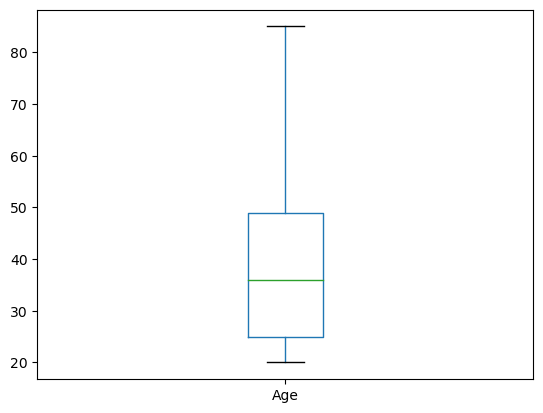

In [86]:
#----------------------- custome_detail dataset --------
# In thus dataset 2 features have numeric values, so we are finding outlier for the same

outlier_age = finding_outliers(df1['Age'])
print('Number of outlier in outlier_age:',len(outlier_age))
print('Maximum outlier value : ',outlier_age.max())
print('Minimum outlier value : ',outlier_age.min())

boxplot(df1,'Age')


Number of outlier in region code : 0
Maximum outlier value : nan
Minimum outlier value : nan


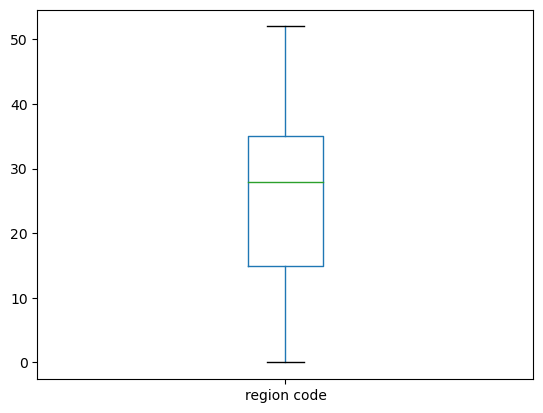

In [87]:
outlier_region = finding_outliers(df1['region code'])
print('Number of outlier in region code :',len(outlier_region))
print('Maximum outlier value :',outlier_region.max())
print('Minimum outlier value :',outlier_region.min())

boxplot(df1,'region code')

Number of outlier in annual premium :  10332
Maximum outlier value : 540165.0
Minimum outlier value : 61858.0


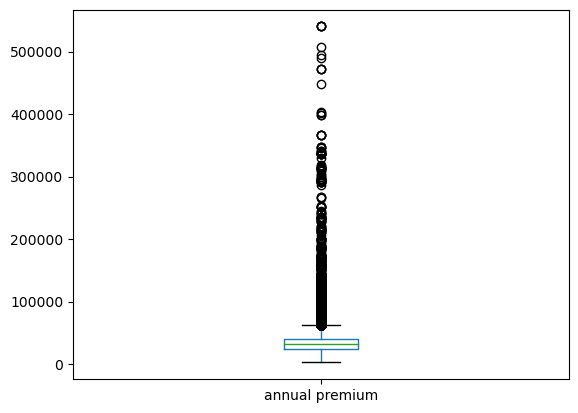

In [88]:
#-------------------- customer policy dataset ------------------
# In this dataset 3 features have numeric values, so we are finding outlier for the same

outlier_ann_prem = finding_outliers(df2['annual premium'])
print('Number of outlier in annual premium : ',len(outlier_ann_prem))
print('Maximum outlier value :',outlier_ann_prem.max())
print('Minimum outlier value :',outlier_ann_prem.min())

boxplot(df2,'annual premium')


Number of outlier in sales channel code : 0
Maximum outlier value : nan
Minimum outlier value : nan


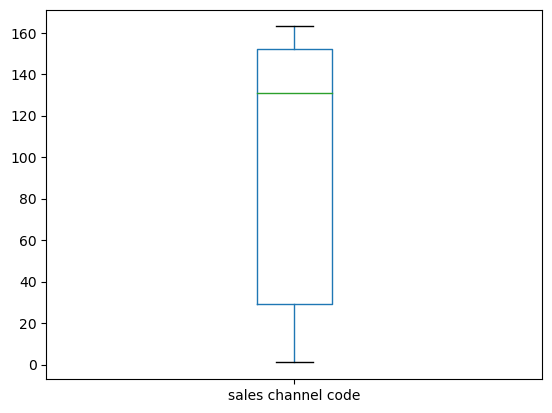

In [89]:
outlier_sales_code = finding_outliers(df2['sales channel code'])
print('Number of outlier in sales channel code :',len(outlier_sales_code))
print('Maximum outlier value :',outlier_sales_code.max())
print('Minimum outlier value :',outlier_sales_code.min())

boxplot(df2,'sales channel code')


Number of outlier in vintage : 0
Maximum outlier value : nan
Minimum outlier value : nan


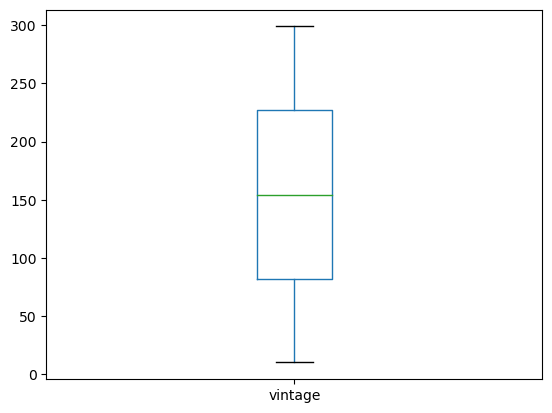

In [90]:
outlier_vintage = finding_outliers(df2['vintage'])
print('Number of outlier in vintage :',len(outlier_vintage))
print('Maximum outlier value :',outlier_vintage.max())
print('Minimum outlier value :',outlier_vintage.min())

boxplot(df2,'vintage')


In [91]:
# 2.B Replace all outlier values for numeric columns by mean.

# define function that replace numeric column by its mean value

def replace_outlier(df):
    q1 = df.quantile(0.25)
    q3 = df.quantile(0.75)
    iqr = q3 - q1
    upper = df[~(df>(q3+1.5*iqr))].max()
    lower = df[~(df<(q1-1.5*iqr))].min()
    df = np.where(df>upper,df.mean(),np.where(df<lower,df.mean(),df))
    return df

# only annual premium in customer policy dataset have outlier so we are replacing with its mean value

df2['annual premium'] = replace_outlier(df2['annual premium'])
# df2['annual pre,=mi']replace_outlier(df2)


In [92]:
df2.isnull().sum()

customer_id           0
annual premium        0
sales channel code    0
vintage               0
response              0
dtype: int64

In [93]:
# 2-C Remove white spaces(leading and trailing)

# ------ customer_detail dataset ---------#
df1["Gender"]=df1["Gender"].str.strip()
df1["vehicle age"]=df1["vehicle age"].str.strip()
df1["vehicle damage"]=df1["vehicle damage"].str.strip()

df1.head()
# ------ customer_policy dataset ---------#
# This data set has all values of float type so no need to remove white space


,customer_id,Gender,Age,driving license present,region code,previously insured,vehicle age,vehicle damage
0,1.0,Male,44.0,1.0,28.0,0.0,> 2 Years,Yes
1,2.0,Male,76.0,1.0,3.0,0.0,1-2 Year,No
2,3.0,Male,47.0,1.0,28.0,0.0,> 2 Years,Yes
3,4.0,Male,21.0,1.0,11.0,1.0,< 1 Year,No
4,5.0,Female,29.0,1.0,41.0,1.0,< 1 Year,No


In [94]:
# 2-D: case correction(lower or upper, any one)

# ------ customer_detail dataset ---------#
df1["Gender"]=df1["Gender"].str.upper()
df1["vehicle age"]=df1["vehicle age"].str.upper()
df1["vehicle damage"]=df1["vehicle damage"].str.upper()

df1.head()
# ------ customer_policy dataset ---------#
# In this data set values are of float type so we are not concern about case correction

,customer_id,Gender,Age,driving license present,region code,previously insured,vehicle age,vehicle damage
0,1.0,MALE,44.0,1.0,28.0,0.0,> 2 YEARS,YES
1,2.0,MALE,76.0,1.0,3.0,0.0,1-2 YEAR,NO
2,3.0,MALE,47.0,1.0,28.0,0.0,> 2 YEARS,YES
3,4.0,MALE,21.0,1.0,11.0,1.0,< 1 YEAR,NO
4,5.0,FEMALE,29.0,1.0,41.0,1.0,< 1 YEAR,NO


In [95]:
# 2-E Convert nominal data (categorical) into dummies

# Dummy variable: It is also called indicator varialbe that are used to label categories.so that feature can be used in machine learning application

# ------ customer_detail dataset ---------#
#In this data set feature vehicle damage has categorical value(YES/NO) 
# so we are converting (YES/NO)----->(1/0)

dummy_var = pd.get_dummies(df1["vehicle damage"]) 

dummy_var.head()


,NO,YES
0,0,1
1,1,0
2,0,1
3,1,0
4,1,0


In [96]:
# changing column name for dummy var
dummy_var.rename(columns={'NO':'vehicle-damage-No', 'YES':'vehicle-damage-Yes'}, inplace=True)

dummy_var.head()

,vehicle-damage-No,vehicle-damage-Yes
0,0,1
1,1,0
2,0,1
3,1,0
4,1,0


In [97]:
# Drop vehicle damage from original data set df1
df1.drop('vehicle damage', axis = 1, inplace=True)

In [98]:
# Merge df1 with dummy var data frame using concat method
df1_new=pd.concat([df1,dummy_var],axis=1)
df1_new.head()

,customer_id,Gender,Age,driving license present,region code,previously insured,vehicle age,vehicle-damage-No,vehicle-damage-Yes
0,1.0,MALE,44.0,1.0,28.0,0.0,> 2 YEARS,0,1
1,2.0,MALE,76.0,1.0,3.0,0.0,1-2 YEAR,1,0
2,3.0,MALE,47.0,1.0,28.0,0.0,> 2 YEARS,0,1
3,4.0,MALE,21.0,1.0,11.0,1.0,< 1 YEAR,1,0
4,5.0,FEMALE,29.0,1.0,41.0,1.0,< 1 YEAR,1,0


In [99]:
# 2-F: Drop Duplicates (duplicated rows)

# ------ customer_detail dataset ---------#
df1.drop_duplicates(inplace=True)

# ------ customer_policy dataset ---------#
df2.drop_duplicates(inplace=True)

3.Create a Master table for future use. Join the customer table and customer_policy table to get a master table using customer_id in both tables

In [101]:
master_data = pd.merge(df1_new,df2,on='customer_id')

master_data

,customer_id,Gender,Age,driving license present,region code,previously insured,vehicle age,vehicle-damage-No,vehicle-damage-Yes,annual premium,sales channel code,vintage,response
0,1.0,MALE,44.0,1.0,28.0,0.0,> 2 YEARS,0,1,40454.0,26.0,217.0,1.0
1,2.0,MALE,76.0,1.0,3.0,0.0,1-2 YEAR,1,0,33536.0,26.0,183.0,0.0
2,3.0,MALE,47.0,1.0,28.0,0.0,> 2 YEARS,0,1,38294.0,26.0,27.0,1.0
3,4.0,MALE,21.0,1.0,11.0,1.0,< 1 YEAR,1,0,28619.0,152.0,203.0,0.0
4,5.0,FEMALE,29.0,1.0,41.0,1.0,< 1 YEAR,1,0,27496.0,152.0,39.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
380331,381105.0,MALE,74.0,1.0,26.0,1.0,1-2 YEAR,1,0,30170.0,26.0,88.0,0.0
380332,381106.0,MALE,30.0,1.0,37.0,1.0,< 1 YEAR,1,0,40016.0,152.0,131.0,0.0
380333,381107.0,MALE,21.0,1.0,30.0,1.0,< 1 YEAR,1,0,35118.0,160.0,161.0,0.0
380334,381108.0,FEMALE,68.0,1.0,14.0,0.0,> 2 YEARS,0,1,44617.0,124.0,74.0,0.0


4. Company needs some important information from the master table to make decisions for future growth.They needs following information:

In [103]:
# 4-A Gender wise average annual premium


gender_data = master_data.groupby('Gender')['annual premium'].mean()

print(gender_data)

# Bar plot 
gender_data.plot.bar(title='Gender vs average annual premium')

Gender
FEMALE    29273.474247
MALE      29323.099677
Name: annual premium, dtype: float64


<Axes: title={'center': 'Gender vs average annual premium'}, xlabel='Gender'>

In [105]:
# 4-B Age wise average annual premium

age_data = master_data.groupby('Age')['annual premium'].mean()
print(age_data)

# Bar plot 
age_data.plot.bar(title='age vs average annual premium',width=0.6)

Age
20.0    26342.073517
21.0    29751.791916
22.0    29946.848634
23.0    29838.344763
24.0    30125.557096
            ...     
81.0    29287.910702
82.0    36480.586199
83.0    28995.818172
84.0    35440.818182
85.0    26637.454525
Name: annual premium, Length: 67, dtype: float64


<Axes: title={'center': 'age vs average annual premium'}, xlabel='Age'>

In [106]:
# 4-C: Is your data balanced between the genders?

# (Hint: Data is balanced if number of counts in each group is approximately same)

master_data.groupby('Gender').count()

,customer_id,Age,driving license present,region code,previously insured,vehicle age,vehicle-damage-No,vehicle-damage-Yes,annual premium,sales channel code,vintage,response
Gender,,,,,,,,,,,,
FEMALE,174485,174485,174485,174485,174485,174485,174485,174485,174485,174485,174485,174485
MALE,205851,205851,205851,205851,205851,205851,205851,205851,205851,205851,205851,205851


In [108]:
# 4-D: Vehicle age wise average annual premium.

vehicle_age_data = master_data.groupby('vehicle age')['annual premium'].mean()
print(vehicle_age_data)

# Bar plot 
vehicle_age_data.plot.bar(title='vehicle_age vs average annual premium',width=0.6)

vehicle age
1-2 YEAR     29102.009839
< 1 YEAR     29188.150594
> 2 YEARS    32943.540830
Name: annual premium, dtype: float64


<Axes: title={'center': 'vehicle_age vs average annual premium'}, xlabel='vehicle age'>

5.Is there any relation between Person Age and annual premium?

In [109]:
# Hint: use correlation function (Correlation describes the relationship between two variables). 
'''Correlation coefficient < -0.5           - Strong negative relationship
Correlation coefficient > 0.5            -  Strong positive relationship
0.5 < Correlation coefficient < 0.5   - There is no relationship. '''

corr_coeff=master_data['Age'].corr(master_data['annual premium'])
print('Coefficient of Correlation is: ',corr_coeff)
if corr_coeff < -0.5 :
    print('Strong negative relationship')
elif corr_coeff > -0.5 and corr_coeff < 0.5:
    print('There is no relationship')
elif corr_coeff > 0.5:
    print('Strong positive relationship')

Coefficient of Correlation is:  0.050657589286175454
There is no relationship
